<a href="https://colab.research.google.com/github/Rayers-Ranjitkar/Rayers_AI_Worksheets/blob/main/Worksheet4_KNN_Algo_Rayers_Ranjitkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem- 1: Perform a classification task with knn from scratch.**

In [ ]:
#1. Load the Dataset:

import pandas as pd
import numpy as np

# Load the diabetes dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/New_Dataset_Workshop4/diabetes_.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#2. Handle Missing Data:

# Check for missing values (percentage)
missing_info = data.isnull().sum() / len(data) * 100
print(missing_info)


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [ ]:
#3. Feature Engineering: Separate the feature matrix (X) and target variable (y).Perform a train- test split from scratch using a 70% − 30% ratio.

import numpy as np

# Separating features (X) and target (y) # X → the “input” (everything the model sees) (independent variable=  feature =  data) , y → the “output” (what the model tries to predict) (dependent variable aka label i.e. outcome)
X = data.drop(columns=['Outcome']).values #.values converts pandas objects to NumPy arrays for vectorized operation (meaning all col operation with another), # Convert features to NumPy array # as ML algorithms like KNN, Logistic Regression, SVM expect NumPy arrays, not pandas DataFrames
y = data['Outcome'].values  # .values() Convert target to NumPy array

#X.values      #everything except the Outcome col aka array except that 'Outcome' #input (features aka independent variable)
# array([[ 1, 3, 22,  7.25],
#        [ 2, 1, 38, 71.28],
#        [ 3, 3, 26,  7.92]])

#y.values   -> target (aka output dependent variable aka label)  #all outcome col values #So the model learns patterns in the numeric features to predict this binary outcome. #0-> no diabetic and 1 = diabetic
# array([0, 1, 1])


def train_test_split_scratch(X, y, test_size=0.3, random_seed=7):
#test_size = The fraction of your dataset that we want to use for testing. #30% of data → test set #70% of data → training set
#random_seed = A number that controls the random shuffling of the data. Purpose: Ensures that the split is reproducible. aka Every time we run our code with this seed → same rows go into train and test. without it, everytime new rows and kun row test ko lagi kun row train ko lagi chutako ho tyo thahanai hunna aka spliting of data would be different everytime. seed = plant the say mango seed, get mango

    np.random.seed(random_seed)
    indices = np.arange(X.shape[0]) #shape returns (2x3) and [0] gives just the rows #So indices is basically a list of row numbers.
    np.random.shuffle(indices)  # Shuffle the indices #If we didn’t shuffle, the first 30% rows might all be from the same class → biased #everytime shuffling bhayepani it won't be random, it would be the same order as seed is the same, aba yei fixed shuffling ko order ma hamiley randomly 1st 300 ota data chahi test ko lagi lincham

    test_split_size = int(len(X) * test_size) #say len(x) =  total rows =  1000 rows then, 1000 * 30% = 300 rows is for test now
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test #X_train → feature rows the model trains on, y_train → corresponding labels the model should learn to predict #since, training indices are the same , x ko feature ma diabetic or not same huncha, x ko features aka independent data haru herera tries to predict y

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output of shapes for verifying
print("Shape of X_train:", X_train.shape) #oh so after dropping in x,  just 6 col remanined and rows we just selected (everything except Diabetic)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape) #624 -> 0 and 1 ...diabetic or not as y = just diabetic col
print("Shape of y_test:", y_test.shape) #267 -> 0 and 1 in the test set (aka 267 ota data)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [ ]:
#4. Implement KNN:

# Computing distances using Euclidean distance
import numpy as np

def euclidean_distance(point1, point2):

    # Checking if the points are of the same dimension as query_data features should be the same number aka columns in each row data
    if point1.shape != point2.shape: #right as we're doing (x2 - x1) whole square
        print("Points must have the same dimensions to calculate Euclidean distance.")
        return None

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance


In [10]:
# Function for KNN prediction for a single query_data

def knn_predict_single_query(query_data, X_train, y_train, k=4):

    distances = [euclidean_distance(query_data, x) for x in X_train] #in x we get -> [1, 3, 22, 1, 0, 7.25] , aka every single data sangha we calculated distance of the query_data: say it was [2, 1, 38, 1, 0, 71.28] and we got distance as 46
    #distances = [66.1, 21.2, 0.0, 57.0, 8.0]

    sorted_indices = np.argsort(distances) #argsort returns the sorted indices aka like which indices comes first not the sorted distance? -> yes and np.sort(distances) = [0.0, 8.0, 21.2, 57.0, 66.1]
    #sorted_indices  = [2, 4, 1, 3, 0]

    nearest_indices = sorted_indices[:k] #if k=3, first 3 data most similar (since, least distance as most data in cols matched) testo data payem
    nearest_labels = y_train[nearest_indices] #getting the label for those indices

    #X_train = [[1,3], [2,1], [3,2], [4,0]]
    #X_train = [0, 1, 2, 3, 4]
    #y_train = [0, 1, 1, 0]  # labels match the rows in X_train
    #sorted_indices  = [2, 4, 1, 3, 0]

    prediction = np.bincount(nearest_labels).argmax() #labels = [1, 1, 0, 1, 0] -> np.bincount(labels) ---> array([2, 3]) #.argmax() → gives the index of the largest count → 1

    return prediction


In [11]:
#Function for Predicting classes for all test samples
def knn_predict_all_test_samples(X_test, X_train, y_train, k=3):

    predictions_arr = [knn_predict_single_query(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions_arr)

"""
X_test = np.array([
    [3, 22, 7.25],   # Test patient 1
    [1, 38, 71.28],  # Test patient 2
    [3, 26, 7.92]    # Test patient 3
])
"""

'\nX_test = np.array([\n    [3, 22, 7.25],   # Test patient 1\n    [1, 38, 71.28],  # Test patient 2\n    [3, 26, 7.92]    # Test patient 3\n])\n'

In [15]:
# Calculating and Evaluating the performance using accuracy.

# Get predictions for the test set
y_pred = knn_predict_all_test_samples(X_test, X_train, y_train, k=4) # Assuming k=4 as used in knn_predict_single_query example

# Calculate accuracy
correct_prediction = np.sum(y_pred == y_test) #[true,false,true,false,false]
total_prediction = len(y_test)
accuracy = (correct_prediction / total_prediction)*100


print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")

Accuracy of the KNN model on the test set: 70.00%


#Problem- 2- Experimentation:

In [ ]:
#why scale? Example: In our two features: Glucose -> ranges 0–200 and  Age -> ranges 0–100 when, calculating the Euclidean distance=(Glucose1​−Glucose2​)**2 + (Age1​−Age2​)**2,  Glucose has bigger numbers → it will dominate the distance and The algorithm might ignore Age, even if Age is important

In [24]:
# Min-Max Scaling for the feature matrix inputs X
X_min = X.min(axis=0)   # minimum value of each column # X = data.drop(columns=['Outcome']).values # axis=0 → calculate the minimum of each column separately.
X_max = X.max(axis=0)   # maximum value of each column

X_scaled = (X - X_min) / (X_max - X_min)  # scaling each data to [0, 1] range
print(X_scaled)


[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [25]:
# Train-test split for scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y, test_size=0.3, random_seed=7)

#Running KNN model on the scaled data
y_pred_scaled_data = knn_predict_all_test_samples(X_test_scaled, X_train_scaled, y_train_scaled, k=4)

# Calculating accuracy
accuracy_scaled_data = (np.sum(y_pred_scaled_data == y_test_scaled) / len(y_test_scaled)) * 100

print(f"Accuracy of the KNN model on the scaled data test set: {accuracy_scaled_data:.2f}%")



Accuracy of the KNN model on the scaled data test set: 69.57%


Impact of Scaling on KNN Performance:

After applying Min-Max scaling to the feature matrix, the KNN model achieved an accuracy of 69.57%, compared to 70% on the original (non-scaled) dataset. This shows that scaling did not significantly improve the performance in this particular case.

In the diabetes dataset, the features may already be on similar scales or already relatively balanced. Therefore, scaling did not drastically change the distances between points, resulting in a small drop in accuracy by 0.43%.

# **Problem- 3- Experimentation with k:**

In [27]:
#1. Varying the number of neighbors - k:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)

accuracies_orignal = []
times_orignal = []

accuracies_scaled = []
times_scaled = []

print("Running KNN model on Original Dataset:")
for k in k_values:
    start = time.time()
    y_pred = knn_predict_all_test_samples(X_test, X_train, y_train, k=k)
    end = time.time()

    accuracy = (np.sum(y_pred == y_test) / len(y_test)) * 100
    accuracies_orignal.append(accuracy)

    time_taken = end-start
    times_orignal.append(time_taken)
    print(f"k={k}, Accuracy={accuracy:.2f}%, Time Taken={time_taken:.2f}s")


print("\nRunning KNN model on Scaled Dataset:")
for k in k_values:
    start = time.time()
    y_pred_scaled = knn_predict_all_test_samples(X_test_scaled, X_train_scaled, y_train, k=k)
    end = time.time()

    accuracy_scaled = (np.sum(y_pred_scaled == y_test) / len(y_test)) * 100
    accuracies_scaled.append(accuracy_scaled)

    time_taken = end-start
    times_scaled.append(time_taken)
    print(f"k={k}, Accuracy={accuracy_scaled:.2f}%, Time Taken={end-start:.2f}s")

Running KNN model on Original Dataset:
k=1, Accuracy=64.78%, Time Taken=0.87s
k=2, Accuracy=67.39%, Time Taken=0.90s
k=3, Accuracy=66.96%, Time Taken=0.85s
k=4, Accuracy=70.00%, Time Taken=0.87s
k=5, Accuracy=68.70%, Time Taken=0.86s
k=6, Accuracy=71.74%, Time Taken=0.87s
k=7, Accuracy=69.13%, Time Taken=0.84s
k=8, Accuracy=73.04%, Time Taken=0.87s
k=9, Accuracy=71.74%, Time Taken=0.86s
k=10, Accuracy=73.91%, Time Taken=0.88s
k=11, Accuracy=74.35%, Time Taken=0.86s
k=12, Accuracy=77.39%, Time Taken=1.36s
k=13, Accuracy=76.52%, Time Taken=1.55s
k=14, Accuracy=76.09%, Time Taken=1.51s
k=15, Accuracy=77.83%, Time Taken=0.84s

Running KNN model on Scaled Dataset:
k=1, Accuracy=70.00%, Time Taken=0.87s
k=2, Accuracy=69.13%, Time Taken=0.87s
k=3, Accuracy=72.17%, Time Taken=0.87s
k=4, Accuracy=69.57%, Time Taken=0.86s
k=5, Accuracy=70.87%, Time Taken=0.87s
k=6, Accuracy=72.17%, Time Taken=0.85s
k=7, Accuracy=71.74%, Time Taken=0.86s
k=8, Accuracy=72.61%, Time Taken=0.88s
k=9, Accuracy=72.61%

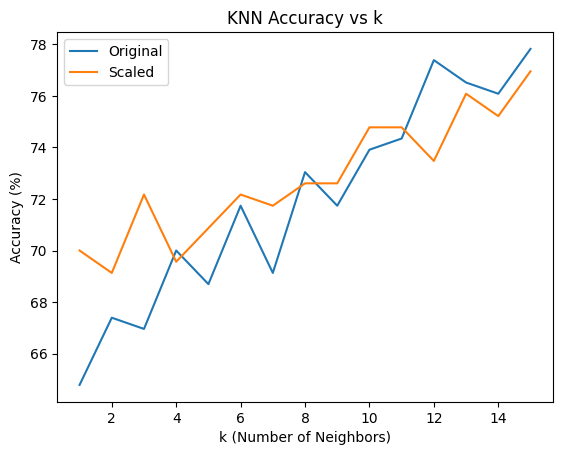

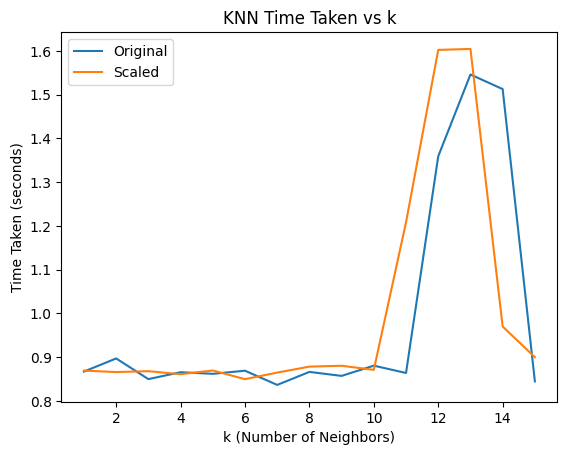

In [29]:
#Visualizing the plots
import matplotlib.pyplot as plt

# Plot k vs Accuracy
plt.plot(k_values, accuracies_orignal, label='Original')
plt.plot(k_values, accuracies_scaled, label='Scaled')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy vs k')
plt.legend()
plt.show()

# Plot k vs Time Taken
plt.plot(k_values, times_orignal, label='Original')
plt.plot(k_values, times_scaled, label='Scaled')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('KNN Time Taken vs k')
plt.legend() #Displays a legend box on the plot. Shows the labels we provided for each line (Original vs Scaled).
plt.show()


**Observation:**

--------------------------------------------------------------

**In Accuracy vs K graph:**

***In original data:***

For even the mid values of k=0 till k=9,  Accuracy has fluctuated alot indicating The model has become very sensitive to noise.

From value k=9 and onward Accuracy tends to stabilize and from k=12 till k=15 reaches its peak.

***In scaled data:***

For small values of k like 2,3 Accuracy has fluctuated alot indicating The model has become very sensitive to noise.

From value k=4 and onward Accuracy tends to **stabilize and from k=12 till k=15 reaches its peak.


---------------------------------------------------------------------------


**In Time taken vs Accuracy graph for both original and scaled dataset**

As k increases, time taken has also slightly varied till k = 10, but after k = 10 till k = 14 the time has rapidly increased as the model now Compute distances to all 10-14 training points and Sort the distances to find the k nearest neighbors.


----------------------------------------------------------------------------
---------------------------------------------------------------------------

**Conclusion:**

When choosing a higher K, i.e. K=12 to K=14 the accuracy has stabalized and increased in both the dataset.
However, When choosing this higher k, it has significantly increased the computational time to increase increasing the computational cost.

Therefore, if I want a higher accuracy and computational cost can be ignored then i would choose the value of K from K=12 to K=14.
But, if i want to get low computational time and cost i would go with the value of k from k=9 to k=11 as the accuracy seems to have stabalized in both the dataset.

# Problem- 4- Additional Questions

**Challenges of Using KNN for Large and High-Dimensional Datasets**

----------------------------------------------------------------
***Observation:***

KNN is a simple and intuitive algorithm, but when applied to large datasets or high-dimensional data, several challenges arise that affect both performance and efficiency.
------------------------------------------------------------------
***Challenges with Large Datasets:***

1. For every test data point, KNN computes the distance with all training data points.

2. As the size of the dataset increases, this leads to high computational cost and slow prediction time.

3. KNN does not learn a model beforehand; instead, it stores the entire training dataset, which increases memory usage.

4. Sorting distances to find the k nearest neighbors becomes expensive when the dataset is very large.



**Strategies to Improve the Efficiency of KNN**
-------------------------------------------------------------------
***1. Scaling:***

Scaling features (using Min-Max Scaling or Standardization) are important for distance-based algorithms like KNN ensures that all features contribute equally to distance calculations.

This prevents features with large ranges from dominating the distance metric.

***2. Approximate Nearest Neighbors:***

Instead of finding exact nearest neighbors, approximate methods search for close-enough neighbors.

This significantly reduces computation time with only a small trade-off in accuracy. It is Useful for very large datasets.

